<a href="https://colab.research.google.com/github/peeka-boo0/ml-learning-journey/blob/main/notebooks/Day11_RF_FeatureImportance_and_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original features: 64
Reduced features: 33
Reduced model best parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
Reduced model best score: 0.9349086969978335


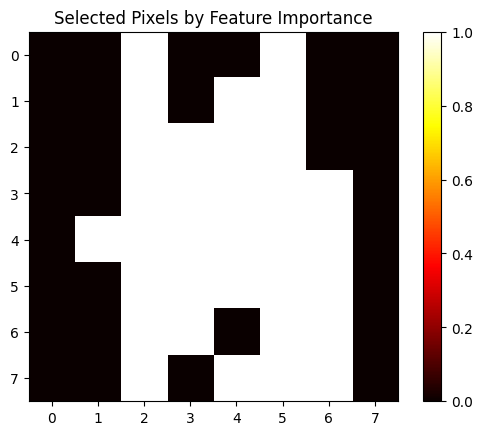

In [ ]:
# Day 11 – Automatic Feature Selection + Heatmap

from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# 1. Load dataset
digits = load_digits()

# 2. Initialize RandomForest
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(digits.data, digits.target)

# 3. Automatic feature selection
selector = SelectFromModel(rf, threshold="mean", prefit=True)
X_reduced = selector.transform(digits.data)

print("Original features:", digits.data.shape[1])   # 64
print("Reduced features:", X_reduced.shape[1])     # depends on threshold

# 4. GridSearch on reduced dataset
param_grid  = {
    'max_depth': [30,60,90],
    'min_samples_split': [2,3],
    'n_estimators': [200,300],
    'max_features': ['sqrt', 'log2']
}

grid_search_reduced = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_reduced.fit(X_reduced, digits.target)

print("Reduced model best parameters:", grid_search_reduced.best_params_)
print("Reduced model best score:", grid_search_reduced.best_score_)

# 5. Plot heatmap of selected features
mask = selector.get_support()  # Boolean array: True = selected feature #the .spport is giving the true and false values for which feacture it keeped and which one it droperd
mask_img = mask.reshape(8, 8)

plt.imshow(mask_img, cmap="hot", interpolation="nearest")
plt.colorbar() #the coler bar is not importent here but its ai code so...
plt.title("Selected Pixels by Feature Importance")
plt.show()


Auto selection -> Features: 33
Top-N selection -> Features: 44


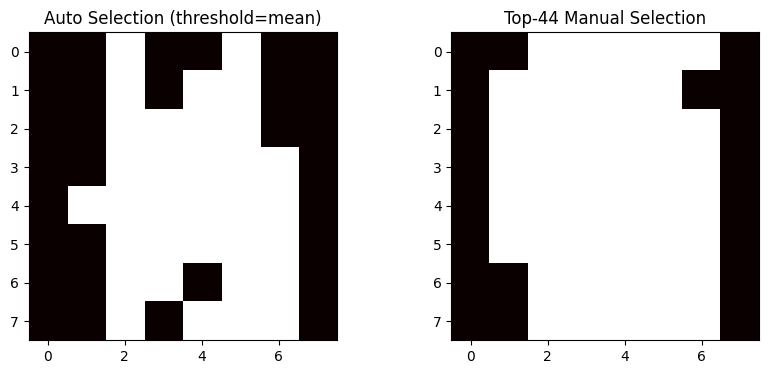

In [ ]:
# Day 11 – Compare Automatic vs Top-N Feature Selection

from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# 1. Load dataset
digits = load_digits()

# 2. Train RandomForest
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(digits.data, digits.target)

# -------------------------------
# A) Automatic selection (sklearn)
# -------------------------------
selector = SelectFromModel(rf, threshold="mean", prefit=True)
X_auto = selector.transform(digits.data)

print("Auto selection -> Features:", X_auto.shape[1])

# -------------------------------
# B) Top-N manual selection
# -------------------------------
N = 44  # top features you picked before
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
top_indices = indices[:N]

X_topN = digits.data[:, top_indices]
print("Top-N selection -> Features:", X_topN.shape[1])

# -------------------------------
# Heatmaps for comparison
# -------------------------------
# Mask for auto selection
mask_auto = selector.get_support().reshape(8, 8)

# Mask for top-N
mask_topN = np.zeros_like(importances, dtype=bool)
mask_topN[top_indices] = True
mask_topN = mask_topN.reshape(8, 8)

 #this shit is hard to understand
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].imshow(mask_auto, cmap="hot", interpolation="nearest")
axes[0].set_title("Auto Selection (threshold=mean)")

axes[1].imshow(mask_topN, cmap="hot", interpolation="nearest")
axes[1].set_title(f"Top-{N} Manual Selection")

plt.show()


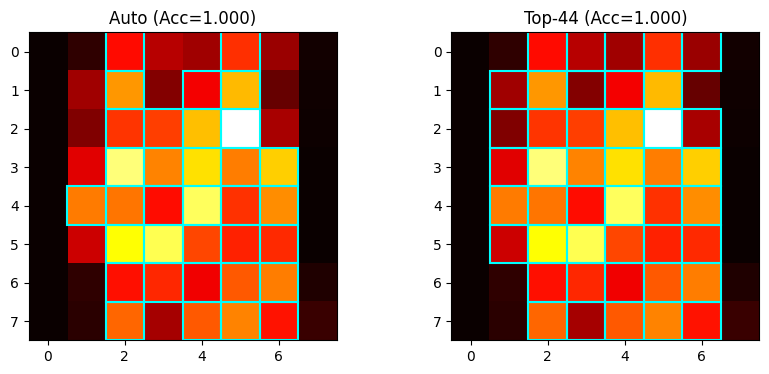

In [ ]:
# Day 11 – Compare Auto vs Top-N Feature Selection
#my code inhansed by ai

from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Load data
digits = load_digits()

# Initialize the model
rf = RandomForestClassifier()

# Parameters for tuning
param_grid = {
    'max_depth': [30, 60, 90],
    'min_samples_split': [2, 3],
    'n_estimators': [200, 300],
    'max_features': ['sqrt', 'log2']
}

# Tune with grid search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(digits.data, digits.target)

# Get feature importances
importances = grid_search.best_estimator_.feature_importances_
importances_img = importances.reshape(8, 8)

# -----------------------------
# 1. Automatic feature selection
# -----------------------------
threshold = np.mean(importances)
mask_auto = importances > threshold #selecting only the values which is grater then the threshold values
X_auto = digits.data[:, mask_auto] # taking only the data set based on the selected values

rf_auto = RandomForestClassifier(**grid_search.best_params_)
rf_auto.fit(X_auto, digits.target)
acc_auto = rf_auto.score(X_auto, digits.target)

# -----------------------------
# 2. Manual top-N feature selection
# -----------------------------
N = 44
indices = np.argsort(importances)[::-1] #np.argsort the array indexis not the actual value like .sort -1 is reversing the sorted indexcis
mask_topN = np.zeros_like(importances, dtype=bool)
mask_topN[indices[:N]] = True
X_topN = digits.data[:, mask_topN] #[rows , column ] all rows and only the mask_topN columns

rf_topN = RandomForestClassifier(**grid_search.best_params_)
rf_topN.fit(X_topN, digits.target)
acc_topN = rf_topN.score(X_topN, digits.target)

# -----------------------------
# Plot importance heatmaps + highlights
# -----------------------------
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Auto selection
axes[0].imshow(importances_img, cmap="hot", interpolation="nearest")
axes[0].set_title(f"Auto (Acc={acc_auto:.3f})")
for (i, j), val in np.ndenumerate(mask_auto.reshape(8, 8)):
    if val:
        axes[0].add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1,
                                        edgecolor='cyan', fill=False, linewidth=1.5))

# Top-N selection
axes[1].imshow(importances_img, cmap="hot", interpolation="nearest")
axes[1].set_title(f"Top-{N} (Acc={acc_topN:.3f})")
for (i, j), val in np.ndenumerate(mask_topN.reshape(8, 8)):
    if val:
        axes[1].add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1,
                                        edgecolor='cyan', fill=False, linewidth=1.5))
#the cyan coler are those square which are taken from prives heatmap to make a new fast heatmap
plt.show()


             Method  Features Kept  Accuracy
0  Auto (Threshold)             32       1.0
1     Top-44 Pixels             44       1.0


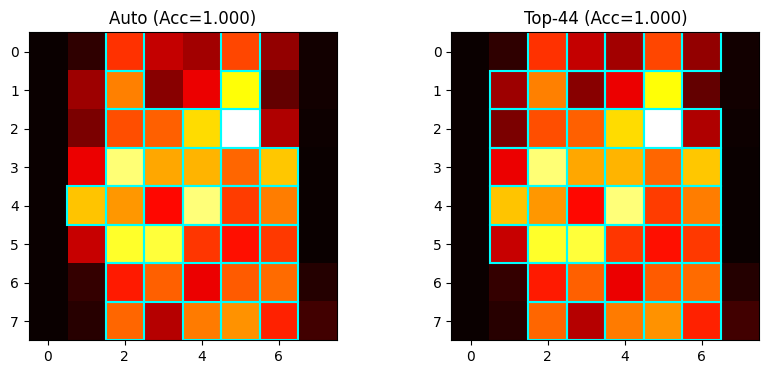

In [1]:
# Day 11 – Compare Auto vs Top-N Feature Selection + Table

from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load data
digits = load_digits()

# Initialize the model
rf = RandomForestClassifier()

# Parameters for tuning
param_grid = {
    'max_depth': [30, 60, 90],
    'min_samples_split': [2, 3],
    'n_estimators': [200, 300],
    'max_features': ['sqrt', 'log2']
}

# Tune with grid search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(digits.data, digits.target)

# Get feature importances
importances = grid_search.best_estimator_.feature_importances_
importances_img = importances.reshape(8, 8)

# -----------------------------
# 1. Automatic feature selection
# -----------------------------
threshold = np.mean(importances)
mask_auto = importances > threshold
X_auto = digits.data[:, mask_auto]

rf_auto = RandomForestClassifier(**grid_search.best_params_)
rf_auto.fit(X_auto, digits.target)
acc_auto = rf_auto.score(X_auto, digits.target)

# -----------------------------
# 2. Manual top-N feature selection
# -----------------------------
N = 44
indices = np.argsort(importances)[::-1]
mask_topN = np.zeros_like(importances, dtype=bool)
mask_topN[indices[:N]] = True
X_topN = digits.data[:, mask_topN]

rf_topN = RandomForestClassifier(**grid_search.best_params_)
rf_topN.fit(X_topN, digits.target)
acc_topN = rf_topN.score(X_topN, digits.target)

# -----------------------------
# Make comparison table
# -----------------------------
results = pd.DataFrame({
    "Method": ["Auto (Threshold)", f"Top-{N} Pixels"],
    "Features Kept": [mask_auto.sum(), N],
    "Accuracy": [acc_auto, acc_topN]
})

print(results)

# -----------------------------
# Plot importance heatmaps + highlights
# -----------------------------
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Auto selection
axes[0].imshow(importances_img, cmap="hot", interpolation="nearest")
axes[0].set_title(f"Auto (Acc={acc_auto:.3f})")
for (i, j), val in np.ndenumerate(mask_auto.reshape(8, 8)):
    if val:
        axes[0].add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1,
                                        edgecolor='cyan', fill=False, linewidth=1.5))

# Top-N selection
axes[1].imshow(importances_img, cmap="hot", interpolation="nearest")
axes[1].set_title(f"Top-{N} (Acc={acc_topN:.3f})")
for (i, j), val in np.ndenumerate(mask_topN.reshape(8, 8)):
    if val:
        axes[1].add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1,
                                        edgecolor='cyan', fill=False, linewidth=1.5))

plt.show()


             Method  Features Kept  Accuracy
0            Top-20             20       1.0
1            Top-30             30       1.0
2            Top-40             40       1.0
3            Top-44             44       1.0
4            Top-50             50       1.0
5            Top-64             64       1.0
6  Auto (Threshold)             33       1.0


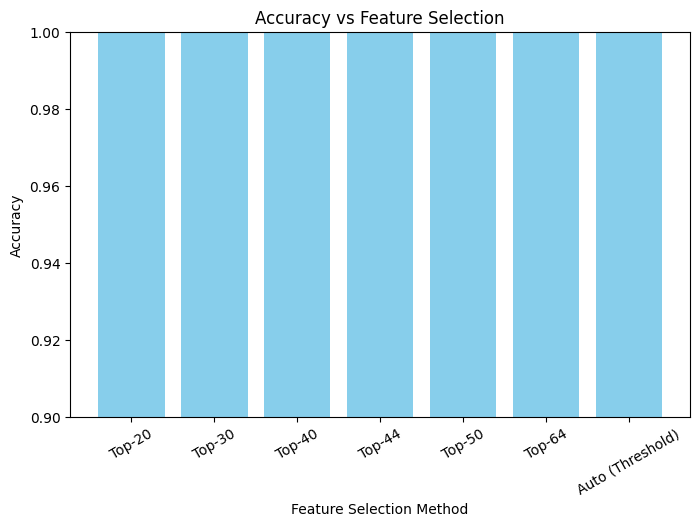

In [2]:
# Day 11 – Compare Auto vs Top-N Feature Selection + Bar Chart

from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load data
digits = load_digits()
rf = RandomForestClassifier()

# Parameters for tuning
param_grid = {
    'max_depth': [30, 60, 90],
    'min_samples_split': [2, 3],
    'n_estimators': [200, 300],
    'max_features': ['sqrt', 'log2']
}

# Tune with grid search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(digits.data, digits.target)

# Get feature importances
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

# -----------------------------
# 1. Auto threshold method
# -----------------------------
threshold = np.mean(importances)
mask_auto = importances > threshold
X_auto = digits.data[:, mask_auto]

rf_auto = RandomForestClassifier(**grid_search.best_params_)
rf_auto.fit(X_auto, digits.target)
acc_auto = rf_auto.score(X_auto, digits.target)

# -----------------------------
# 2. Top-N experiments
# -----------------------------
topN_list = [20, 30, 40, 44, 50, 64]  # test different N
results = []

for N in topN_list:
    mask_topN = np.zeros_like(importances, dtype=bool)
    mask_topN[indices[:N]] = True
    X_topN = digits.data[:, mask_topN]

    rf_topN = RandomForestClassifier(**grid_search.best_params_)
    rf_topN.fit(X_topN, digits.target)
    acc_topN = rf_topN.score(X_topN, digits.target)

    results.append(("Top-" + str(N), N, acc_topN))

# Add Auto method to results
results.append(("Auto (Threshold)", mask_auto.sum(), acc_auto))

# Convert to DataFrame
results_df = pd.DataFrame(results, columns=["Method", "Features Kept", "Accuracy"])
print(results_df)

# -----------------------------
# Bar Chart
# -----------------------------
plt.figure(figsize=(8, 5))
plt.bar(results_df["Method"], results_df["Accuracy"], color="skyblue")
plt.xlabel("Feature Selection Method")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Feature Selection")
plt.xticks(rotation=30)
plt.ylim(0.9, 1.0)
plt.show()
